# Developing a Neural Bag-of-Words Model for Sentiment Analysis
* The evaluation of movie review text is a classification problem often called **sentiment analysis**.

## 1. Data Preparation
* Separation of data into training and test sets.
* Loading and cleaning the data to remove punctuation and numbers.
* Defining a vocabulary of preferred words.

In [1]:
## train-test split 90-10

### 1.1 Loading and Cleaning Reviews
* Split tokens on white space
* Remove all punctuation from words
* Remove all words that are not purely comprised of alphabetical characters.
* Remove all words that are known stop words.
* Remove all words that have length <=1 character.

In [2]:
from nltk.corpus import stopwords
import string
import re

# load doc into memory
def load_doc(filename):
    file = open(filename,'r')
    text = file.read()
    file.close()
    return text

# turn doc into clean tokens
def clean_doc(doc):
    tokens = doc.split()
    re_punc = re.compile('[%s]' %re.escape(string.punctuation))
    tokens = [re_punc.sub('',w) for w in tokens]
    tokens = [word for word in tokens if word.isalpha()]
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]
    tokens = [word for word in tokens if len(word)>1]
    return tokens

# load the document
filename = 'txt_sentoken/pos/cv000_29590.txt'
text = load_doc(filename)
tokens = clean_doc(text)
print(tokens)

['films', 'adapted', 'comic', 'books', 'plenty', 'success', 'whether', 'theyre', 'superheroes', 'batman', 'superman', 'spawn', 'geared', 'toward', 'kids', 'casper', 'arthouse', 'crowd', 'ghost', 'world', 'theres', 'never', 'really', 'comic', 'book', 'like', 'hell', 'starters', 'created', 'alan', 'moore', 'eddie', 'campbell', 'brought', 'medium', 'whole', 'new', 'level', 'mid', 'series', 'called', 'watchmen', 'say', 'moore', 'campbell', 'thoroughly', 'researched', 'subject', 'jack', 'ripper', 'would', 'like', 'saying', 'michael', 'jackson', 'starting', 'look', 'little', 'odd', 'book', 'graphic', 'novel', 'pages', 'long', 'includes', 'nearly', 'consist', 'nothing', 'footnotes', 'words', 'dont', 'dismiss', 'film', 'source', 'get', 'past', 'whole', 'comic', 'book', 'thing', 'might', 'find', 'another', 'stumbling', 'block', 'hells', 'directors', 'albert', 'allen', 'hughes', 'getting', 'hughes', 'brothers', 'direct', 'seems', 'almost', 'ludicrous', 'casting', 'carrot', 'top', 'well', 'anythi

### 1.2 Define a Vocabulary


In [3]:
from nltk.corpus import stopwords
import string
import re
from os import listdir
from collections import Counter

# load doc into memory
def load_doc(filename):
    file = open(filename,'r')
    text = file.read()
    file.close()
    return text

# turn doc into clean tokens
def clean_doc(doc):
    tokens = doc.split()
    re_punc = re.compile('[%s]' %re.escape(string.punctuation))
    tokens = [re_punc.sub('',w) for w in tokens]
    tokens = [word for word in tokens if word.isalpha()]
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]
    tokens = [word for word in tokens if len(word)>1]
    return tokens

# load doc and add to vocab
def add_doc_to_vocab(filename,vocab):
    doc = load_doc(filename)
    tokens = clean_doc(doc)
    vocab.update(tokens)
    
# load all docs in a directory
def process_docs(directory,vocab):
    for filename in listdir(directory):
        if filename.startswith('cv9'):
            continue
        path = directory + '/' + filename
        add_doc_to_vocab(path,vocab)
        
# save list to file
def save_list(lines,filename):
    data = '\n'.join(lines)
    file = open(filename,'w')
    file.write(data)
    file.close()

# define vocab
vocab = Counter()
process_docs('txt_sentoken/pos',vocab)
process_docs('txt_sentoken/neg',vocab)

print(len(vocab))

# keep tokens with a min occurence
min_occurence = 2
tokens = [k for k,c in vocab.items() if c >=min_occurence]
print(len(tokens))
save_list(tokens,'vocab1.txt')

44276
25767


## 2. Bag-of-Words Representation
* A bag-of-words model is a way of extracting features from text so the text input can be used with machine learning algorithms like neural networks 
* Each document, in this case a review, is converted into a vector representation

### 2.1 Converting Reviews to lines of tokens


In [4]:
# load doc, clean and return line of tokens
def doc_to_line(filename,vocab):
    doc = load_doc(filename)
    text = clean_doc(doc)
    # filter by vocab
    tokens = [w for w in tokens if w in vocab]
    return ' '.join(tokens)

In [5]:
# load all docs in a directory
def process_docs(directory,vocab):
    lines = list()
    for filename in listdir(directory):
        if filename.startswith('cv9'):
            continue
        path = directory + '/' + filename
        line = doc_to_line(path,vocab)
        lines.append(line)
    return lines

In [6]:
# load and clean a dataset
def load_clean_dataset(vocab):
    neg = process_docs('txt_sentoken/neg',vocab)
    pos = process_docs('txt_sentoken/pos',vocab)
    docs = neg + pos
    labels = [0 for _ in range(len(neg))] + [1 for _ in range(len(pos))]
    return docs,labels

In [7]:
# load the vocabulary
vocab_filename = 'vocab1.txt'
vocab = load_doc(vocab_filename)
vocab = set(vocab.split())

# load all training reviews
docs,labels = load_clean_dataset(vocab)
print(len(docs),len(labels))

UnboundLocalError: local variable 'tokens' referenced before assignment

In [8]:
from nltk.corpus import stopwords
import string
import re
from os import listdir
from collections import Counter

# load doc into memory
def load_doc(filename):
    file = open(filename,'r')
    text = file.read()
    file.close()
    return text

# turn doc into clean tokens
def clean_doc(doc):
    tokens = doc.split()
    re_punc = re.compile('[%s]' %re.escape(string.punctuation))
    tokens = [re_punc.sub('',w) for w in tokens]
    tokens = [word for word in tokens if word.isalpha()]
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]
    tokens = [word for word in tokens if len(word)>1]
    return tokens

# load doc, clean and return line of tokens
def doc_to_line(filename,vocab):
    doc = load_doc(filename)
    text = clean_doc(doc)
    # filter by vocab
    tokens = [w for w in tokens if w in vocab]
    return ' '.join(tokens)

# load all docs in a directory
def process_docs(directory,vocab):
    lines = list()
    for filename in listdir(directory):
        if filename.startswith('cv9'):
            continue
        path = directory + '/' + filename
        line = doc_to_line(path,vocab)
        lines.append(line)
    return lines

# load and clean a dataset
def load_clean_dataset(vocab):
    neg = process_docs('txt_sentoken/neg',vocab)
    pos = process_docs('txt_sentoken/pos',vocab)
    docs = neg + pos
    labels = [0 for _ in range(len(neg))] + [1 for _ in range(len(pos))]
    return docs,labels

# load the vocabulary
vocab_filename = 'vocab1.txt'
vocab = load_doc(vocab_filename)
vocab = set(vocab.split())

# load all training reviews
docs,labels = load_clean_dataset(vocab)
print(len(docs),len(labels))
        



UnboundLocalError: local variable 'tokens' referenced before assignment

In [9]:
import string
import re
from os import listdir
from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer
# load doc into memory
def load_doc(filename):
    # open the file as read only
    file = open(filename, 'r' )
    # read all text
    text = file.read()
    # close the file
    file.close()
    return text

# turn a doc into clean tokens
def clean_doc(doc):
    # split into tokens by white space
    tokens = doc.split()
    # prepare regex for char filtering
    re_punc = re.compile( '[%s]' % re.escape(string.punctuation))
    # remove punctuation from each word
    tokens = [re_punc.sub( '' , w) for w in tokens]
    # remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    # filter out stop words
    stop_words = set(stopwords.words( 'english' ))
    tokens = [w for w in tokens if not w in stop_words]
    # filter out short tokens
    tokens = [word for word in tokens if len(word) > 1]
    return tokens

# load doc, clean and return line of tokens
def doc_to_line(filename, vocab):
    # load the doc
    doc = load_doc(filename)
    # clean doc
    tokens = clean_doc(doc)
    # filter by vocab
    tokens = [w for w in tokens if w in vocab]
    return ' ' .join(tokens)

# load all docs in a directory
def process_docs(directory, vocab, is_train):
    lines = list()
    # walk through all files in the folder
    for filename in listdir(directory):
        # skip any reviews in the test set
        if is_train and filename.startswith('cv9'):
            continue

        if not is_train and not filename.startswith('cv9'):
            continue
        # create the full path of the file to open
        path = directory + '/' + filename
        # load and clean the doc
        line = doc_to_line(path, vocab)
        # add to list
        lines.append(line)
    return lines
    
# load and clean a dataset
def load_clean_dataset(vocab, is_train):
    # load documents
    neg = process_docs('txt_sentoken/neg' , vocab, is_train)
    pos = process_docs('txt_sentoken/pos' , vocab, is_train)
    docs = neg + pos
    # prepare labels
    labels = [0 for _ in range(len(neg))] + [1 for _ in range(len(pos))]
    return docs, labels

# fit a tokenizer
def create_tokenizer(lines):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(lines)
    return tokenizer

# load the vocabulary
vocab_filename = 'vocab1.txt'
vocab = load_doc(vocab_filename)
vocab = set(vocab.split())
# load all reviews
train_docs, ytrain = load_clean_dataset(vocab, True)
test_docs, ytest = load_clean_dataset(vocab, False)
# create the tokenizer
tokenizer = create_tokenizer(train_docs)
# encode data
Xtrain = tokenizer.texts_to_matrix(train_docs, mode='freq')
Xtest = tokenizer.texts_to_matrix(test_docs, mode='freq')
print(Xtrain.shape, Xtest.shape)

(1800, 25768) (200, 25768)


## 3. Sentiment Analysis Models

### 3.1 First Sentiment Analysis Model


In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model
import string
import re
from os import listdir
from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer
import numpy as np
# load doc into memory
def load_doc(filename):
    # open the file as read only
    file = open(filename, 'r' )
    # read all text
    text = file.read()
    # close the file
    file.close()
    return text

# turn a doc into clean tokens
def clean_doc(doc):
    # split into tokens by white space
    tokens = doc.split()
    # prepare regex for char filtering
    re_punc = re.compile( '[%s]' % re.escape(string.punctuation))
    # remove punctuation from each word
    tokens = [re_punc.sub( '' , w) for w in tokens]
    # remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    # filter out stop words
    stop_words = set(stopwords.words( 'english' ))
    tokens = [w for w in tokens if not w in stop_words]
    # filter out short tokens
    tokens = [word for word in tokens if len(word) > 1]
    return tokens

# load doc, clean and return line of tokens
def doc_to_line(filename, vocab):
    # load the doc
    doc = load_doc(filename)
    # clean doc
    tokens = clean_doc(doc)
    # filter by vocab
    tokens = [w for w in tokens if w in vocab]
    return ' ' .join(tokens)

# load all docs in a directory
def process_docs(directory, vocab, is_train):
    lines = list()
    # walk through all files in the folder
    for filename in listdir(directory):
        # skip any reviews in the test set
        if is_train and filename.startswith('cv9'):
            continue

        if not is_train and not filename.startswith('cv9'):
            continue
        # create the full path of the file to open
        path = directory + '/' + filename
        # load and clean the doc
        line = doc_to_line(path, vocab)
        # add to list
        lines.append(line)
    return lines
    
# load and clean a dataset
def load_clean_dataset(vocab, is_train):
    # load documents
    neg = process_docs('txt_sentoken/neg' , vocab, is_train)
    pos = process_docs('txt_sentoken/pos' , vocab, is_train)
    docs = neg + pos
    # prepare labels
    labels = [0 for _ in range(len(neg))] + [1 for _ in range(len(pos))]
    return docs, labels

# fit a tokenizer
def create_tokenizer(lines):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(lines)
    return tokenizer

# define the model
def define_model(n_words):
    # define network
    model = Sequential()
    model.add(Dense(50,input_shape=(n_words,),activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    
    # compile network
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    
    # summarize defined model
    model.summary()
    plot_model(model,to_file='model.png',show_shapes=True)
    return model

# load the vocabulary
vocab_filename = 'vocab1.txt'
vocab = load_doc(vocab_filename)
vocab = set(vocab.split())
# load all reviews
train_docs, ytrain = load_clean_dataset(vocab, True)
test_docs, ytest = load_clean_dataset(vocab, False)
# create the tokenizer
tokenizer = create_tokenizer(train_docs)
# encode data
Xtrain = tokenizer.texts_to_matrix(train_docs, mode='freq')
Xtest = tokenizer.texts_to_matrix(test_docs, mode='freq')
# print(Xtrain.shape, Xtest.shape)
n_words = Xtest.shape[1]
model = define_model(n_words)
model.fit(np.array(Xtrain),np.array(ytrain),epochs=10,verbose=2)
loss,acc = model.evaluate(np.array(Xtest),np.array(ytest),verbose=0)
print('Test Accuracy: %f' %(acc*100))


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                1288450   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 1,288,501
Trainable params: 1,288,501
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
57/57 - 1s - loss: 0.6912 - accuracy: 0.6089
Epoch 2/10
57/57 - 1s - loss: 0.6800 - accuracy: 0.8928
Epoch 3/10
57/57 - 1s - loss: 0.6607 - accuracy: 0.8667
Epoch 4/10
57/57 - 1s - loss: 0.6341 - accuracy: 0.8656
Epoch 5/10
57/57 - 1s - loss: 0.5996 - accuracy: 0.9278
Epoch 6/10
57/57 - 1s - loss: 0.5592 - accuracy: 0.9317
Epoch 7/10
57/57 - 1s - loss: 0.5178 - accuracy: 0.9422
Epoch 8/10
57/57 - 1s - loss: 0.4739 - accuracy: 0.9550
Epoch 9/10
57/57 - 1s - loss: 0.4318 - accuracy: 0.9650
Epoc

## 4. Comparing Word Scoring Methods
The **texts_to_matrix()** function for the **Tokenizer** in the keras API provides 4 different methods for scoring words : 
* **binary** : Where words are marked as present(1) or absent(0).
* **count** : Where the occurence count for each word is marked as integer.
* **tfidf** : Where each word is scored based on the frequency,where words that are common across all documents are penalized.
* **freq** : Where words are scored based on their frequency of occurence within the document.

In [11]:
# prepare bag-of-words encoding of docs
def prepare_data(train_docs,test_docs,mode):
    # create the tokenizer
    tokenzer = Tokenizer()
    # fit the tokenizer on the documents
    tokenizer.fit_on_texts(train_docs)
    # encode training data set
    Xtrain = tokenizer.texts_to_matrix(train_docs,mode=mode)
    # encode testing data set
    Xtest = tokenizer.texts_to_matrix(test_docs,mode=mode)
    return Xtrain,Xtest


In [12]:
# evaluate a neural network model
def evaluate_mode(Xtrain,ytrain,Xtest,ytest):
    scores = list()
    n_repeats = 30
    n_words = Xtest.shape[1]
    for i in range(n_repeats):
        # define network
        model = Sequential()
        model.add(Dense(50,input_shape=(n_words,),activation='relu'))
        model.add(Dense(1,activation='sigmoid'))
        # compile network
        model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
        # fit network
        model.fit(Xtrain,ytrain,epochs=10,verbose=2)
        # evaluate
        loss,acc = model.evaluate(Xtest,ytest,verbose=0)
        scores.append(acc)
        print('%d accuracy: %s' %((i+1),acc))
        
    return scores

In [13]:
from pandas import DataFrame
from matplotlib import pyplot
# run experiment
modes = ['binary','count','tfidf','freq']
results = DataFrame()
for mode in modes:
    # prepare data for mode
    Xtrain,Xtest = prepare_data(train_docs,test_docs,mode)
    # evaluate model on data for mode
    results[mode] = evaluate_mode(np.array(Xtrain),np.array(ytrain),np.array(Xtest),np.array(ytest))
# summarize results
print(results.describe())
# plot results
results.boxplot()
pyplot.show()

Epoch 1/10
57/57 - 1s - loss: 0.4725 - accuracy: 0.7861
Epoch 2/10
57/57 - 1s - loss: 0.0595 - accuracy: 0.9933
Epoch 3/10
57/57 - 1s - loss: 0.0175 - accuracy: 1.0000
Epoch 4/10
57/57 - 1s - loss: 0.0091 - accuracy: 1.0000
Epoch 5/10
57/57 - 1s - loss: 0.0054 - accuracy: 1.0000
Epoch 6/10
57/57 - 1s - loss: 0.0036 - accuracy: 1.0000
Epoch 7/10
57/57 - 1s - loss: 0.0025 - accuracy: 1.0000
Epoch 8/10
57/57 - 1s - loss: 0.0018 - accuracy: 1.0000
Epoch 9/10
57/57 - 1s - loss: 0.0014 - accuracy: 1.0000
Epoch 10/10
57/57 - 1s - loss: 0.0011 - accuracy: 1.0000
1 accuracy: 0.925000011920929
Epoch 1/10
57/57 - 1s - loss: 0.4653 - accuracy: 0.7961
Epoch 2/10
57/57 - 1s - loss: 0.0606 - accuracy: 0.9972
Epoch 3/10
57/57 - 1s - loss: 0.0187 - accuracy: 1.0000
Epoch 4/10
57/57 - 1s - loss: 0.0082 - accuracy: 1.0000
Epoch 5/10
57/57 - 1s - loss: 0.0041 - accuracy: 1.0000
Epoch 6/10
57/57 - 1s - loss: 0.0025 - accuracy: 1.0000
Epoch 7/10
57/57 - 1s - loss: 0.0016 - accuracy: 1.0000
Epoch 8/10
57/57 

Epoch 9/10
57/57 - 1s - loss: 6.4238e-04 - accuracy: 1.0000
Epoch 10/10
57/57 - 1s - loss: 5.0604e-04 - accuracy: 1.0000
14 accuracy: 0.9300000071525574
Epoch 1/10
57/57 - 1s - loss: 0.4763 - accuracy: 0.7717
Epoch 2/10
57/57 - 1s - loss: 0.0586 - accuracy: 0.9956
Epoch 3/10
57/57 - 1s - loss: 0.0153 - accuracy: 1.0000
Epoch 4/10
57/57 - 1s - loss: 0.0067 - accuracy: 1.0000
Epoch 5/10
57/57 - 1s - loss: 0.0038 - accuracy: 1.0000
Epoch 6/10
57/57 - 1s - loss: 0.0025 - accuracy: 1.0000
Epoch 7/10
57/57 - 1s - loss: 0.0018 - accuracy: 1.0000
Epoch 8/10
57/57 - 1s - loss: 0.0013 - accuracy: 1.0000
Epoch 9/10
57/57 - 1s - loss: 0.0010 - accuracy: 1.0000
Epoch 10/10
57/57 - 1s - loss: 8.3657e-04 - accuracy: 1.0000
15 accuracy: 0.9399999976158142
Epoch 1/10
57/57 - 1s - loss: 0.4590 - accuracy: 0.7883
Epoch 2/10
57/57 - 1s - loss: 0.0546 - accuracy: 0.9956
Epoch 3/10
57/57 - 1s - loss: 0.0160 - accuracy: 1.0000
Epoch 4/10
57/57 - 1s - loss: 0.0076 - accuracy: 1.0000
Epoch 5/10
57/57 - 1s - lo

Epoch 6/10
57/57 - 1s - loss: 0.0024 - accuracy: 1.0000
Epoch 7/10
57/57 - 1s - loss: 0.0015 - accuracy: 1.0000
Epoch 8/10
57/57 - 1s - loss: 9.6534e-04 - accuracy: 1.0000
Epoch 9/10
57/57 - 1s - loss: 6.6851e-04 - accuracy: 1.0000
Epoch 10/10
57/57 - 1s - loss: 4.8634e-04 - accuracy: 1.0000
28 accuracy: 0.9300000071525574
Epoch 1/10
57/57 - 1s - loss: 0.4804 - accuracy: 0.7828
Epoch 2/10
57/57 - 1s - loss: 0.0677 - accuracy: 0.9933
Epoch 3/10
57/57 - 1s - loss: 0.0195 - accuracy: 1.0000
Epoch 4/10
57/57 - 1s - loss: 0.0091 - accuracy: 1.0000
Epoch 5/10
57/57 - 1s - loss: 0.0050 - accuracy: 1.0000
Epoch 6/10
57/57 - 1s - loss: 0.0028 - accuracy: 1.0000
Epoch 7/10
57/57 - 1s - loss: 0.0016 - accuracy: 1.0000
Epoch 8/10
57/57 - 1s - loss: 0.0011 - accuracy: 1.0000
Epoch 9/10
57/57 - 1s - loss: 7.5256e-04 - accuracy: 1.0000
Epoch 10/10
57/57 - 1s - loss: 5.6013e-04 - accuracy: 1.0000
29 accuracy: 0.9200000166893005
Epoch 1/10
57/57 - 1s - loss: 0.4898 - accuracy: 0.7606
Epoch 2/10
57/57 -

KeyboardInterrupt: 

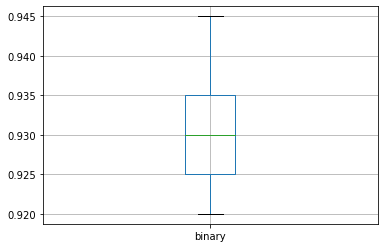

In [14]:
# plot results
results.boxplot()
pyplot.show()

In [15]:
print(results.describe())

          binary
count  30.000000
mean    0.930833
std     0.006706
min     0.920000
25%     0.925000
50%     0.930000
75%     0.935000
max     0.945000


## 5. Predicting Sentiment for New Reviews


In [16]:
# classify a review as negative or positive
def predict_sentiment(review,vocab,tokenizer,model):
    # clean
    tokens = clean_doc(review)
    # filter by vocab
    tokens = [w for w in tokens if w in vocab]
    # convert to line
    line = ' '.join(tokens)
    # encode
    encoded = tokenizer.texts_to_matrix([line],mode='binary')
    # predict sentiment
    yhat = model.predict(encoded,verbose=0)
    # retrieve predicted percentage and label
    percent_pos = yhat[0,0]
    if round(percent_pos) == 0:
        return (1 - percent_pos), 'NEGATIVE'
    return percent_pos, 'POSITIVE'

In [ ]:
# test positive text
text = 'Best Movie ever! It was great, I recommend it.'
percent,sentiment = predict_sentiment(text,vocab,tokenizer,model)
print('Review: [%s]\nSentiment: %s (%.3f%%)' %(text,sentiment,percent*100))

# test negative text
text = 'This is a bad movie'
percent, sentiment = predict_sentiment(text,vocab,tokenizer,model)
print('Review: [%s]')